In [277]:
# Install the required libraries
!pip install prophet

In [278]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
from matplotlib.ticker import FuncFormatter


%matplotlib inline

In [279]:
home_ownership_rate = pd.read_csv("Home Ownership Rate (Hamilton, OH) - Home Ownership Rate.csv")
us_census = pd.read_csv("US Census (Hamilton, OH) - Sheet1.csv")
home_value_forecast = pd.read_csv("Home Value Forecast - Sheet1.csv")
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")
zestimate = pd.read_csv("Zillow Housing Estimate Index - Sheet1.csv")
wood_prices = pd.read_csv("wood_prices_dataset.csv")


In [280]:
# Dropping rows that have null values
home_value_forecast_dropped = home_value_forecast.dropna()

# Displaying the new dataframe
display(home_value_forecast_dropped)

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,12/31/2023,2/29/2024,11/30/2024
1,394913,1,"New York, NY",msa,NY,11/30/2023,0.1,-0.5,-2.9
2,753899,2,"Los Angeles, CA",msa,CA,11/30/2023,0.3,-1.0,-2.2
3,394463,3,"Chicago, IL",msa,IL,11/30/2023,0.1,-0.3,-2.2
4,394514,4,"Dallas, TX",msa,TX,11/30/2023,-0.2,-0.8,-0.8
5,394692,5,"Houston, TX",msa,TX,11/30/2023,-0.3,-1.1,-2.0
...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,11/30/2023,-1.6,-3.9,-9.5
891,394743,936,"Ketchikan, AK",msa,AK,11/30/2023,-0.5,-1.0,-3.8
892,753874,937,"Craig, CO",msa,CO,11/30/2023,0.0,-0.3,1.0
893,395188,938,"Vernon, TX",msa,TX,11/30/2023,-1.3,-2.8,-5.0


In [281]:
# Dropping irrelevant columns to get ready to plot
home_value_forecast_dropped_columns = home_value_forecast_dropped.drop(columns=['RegionID', 'SizeRank', "RegionType", "StateName", "BaseDate"])

# Displaying the new dataframe
display(home_value_forecast_dropped_columns)

,RegionName,12/31/2023,2/29/2024,11/30/2024
1,"New York, NY",0.1,-0.5,-2.9
2,"Los Angeles, CA",0.3,-1.0,-2.2
3,"Chicago, IL",0.1,-0.3,-2.2
4,"Dallas, TX",-0.2,-0.8,-0.8
5,"Houston, TX",-0.3,-1.1,-2.0
...,...,...,...,...
890,"Zapata, TX",-1.6,-3.9,-9.5
891,"Ketchikan, AK",-0.5,-1.0,-3.8
892,"Craig, CO",0.0,-0.3,1.0
893,"Vernon, TX",-1.3,-2.8,-5.0


<Axes: >

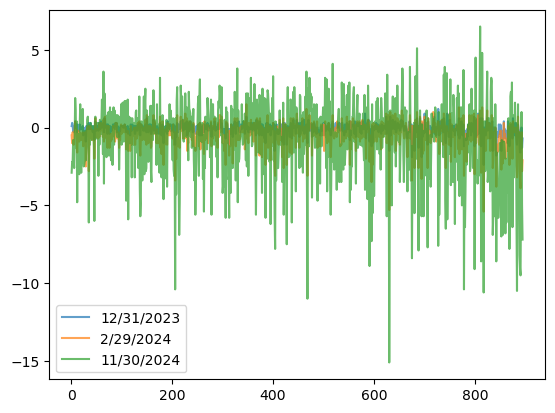

In [282]:
# Plotting our new dataframe on a line graph
home_value_forecast_dropped_columns.plot(alpha=0.7)

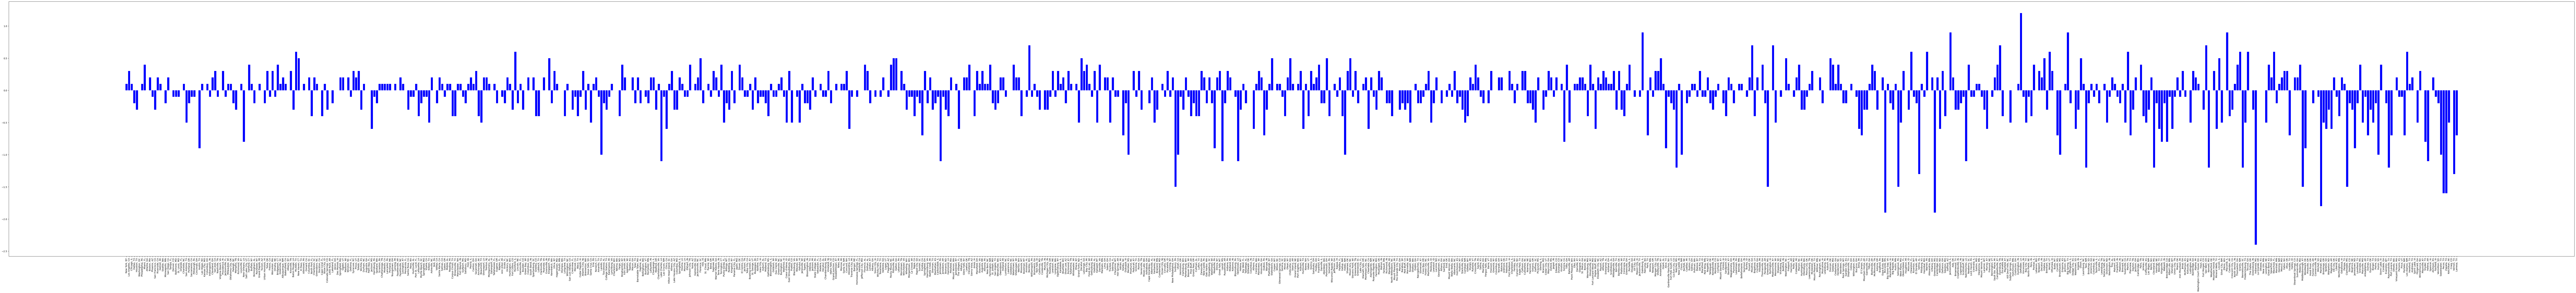

In [283]:
# Further dropping columns to show the month forecast for home values
hvf_dropped_columns_month = home_value_forecast_dropped_columns.drop(columns=['2/29/2024', '11/30/2024'])

# Adjusting the size of the graph
plt.subplots(figsize=(200,20))

# Setting the x-axis
x_axis = np.arange(len(hvf_dropped_columns_month['12/31/2023']))

# Plotting the bar graph
plt.bar(x_axis, hvf_dropped_columns_month['12/31/2023'], color="b", align="center")

# Labeling our x-axis properly with the names of the cities
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, hvf_dropped_columns_month['RegionName'], rotation="vertical")

# Showing the graph
plt.show()

In [284]:
# Ensuring that the datatype of the RegionName column is a string
home_value_forecast_dropped_columns['RegionName'] = home_value_forecast_dropped_columns['RegionName'].astype(str)

# Filtering through the dataframe to just show the cities located in Ohio
hvf_oh = home_value_forecast_dropped_columns[home_value_forecast_dropped_columns['RegionName'].str.endswith('OH')]

# Displaying the filtered dataframe
display(hvf_oh)

,RegionName,12/31/2023,2/29/2024,11/30/2024
28,"Cincinnati, OH",0.0,-0.3,-0.2
32,"Columbus, OH",0.1,0.0,0.5
34,"Cleveland, OH",0.2,0.1,-0.4
81,"Akron, OH",0.0,-0.4,-0.9
90,"Toledo, OH",0.3,0.3,-0.3
103,"Youngstown, OH",0.0,-0.2,0.0
134,"Canton, OH",0.1,-0.3,-0.9
307,"Springfield, OH",0.3,0.4,1.3
327,"Mansfield, OH",0.3,0.4,1.4
376,"Lima, OH",0.2,0.1,0.0


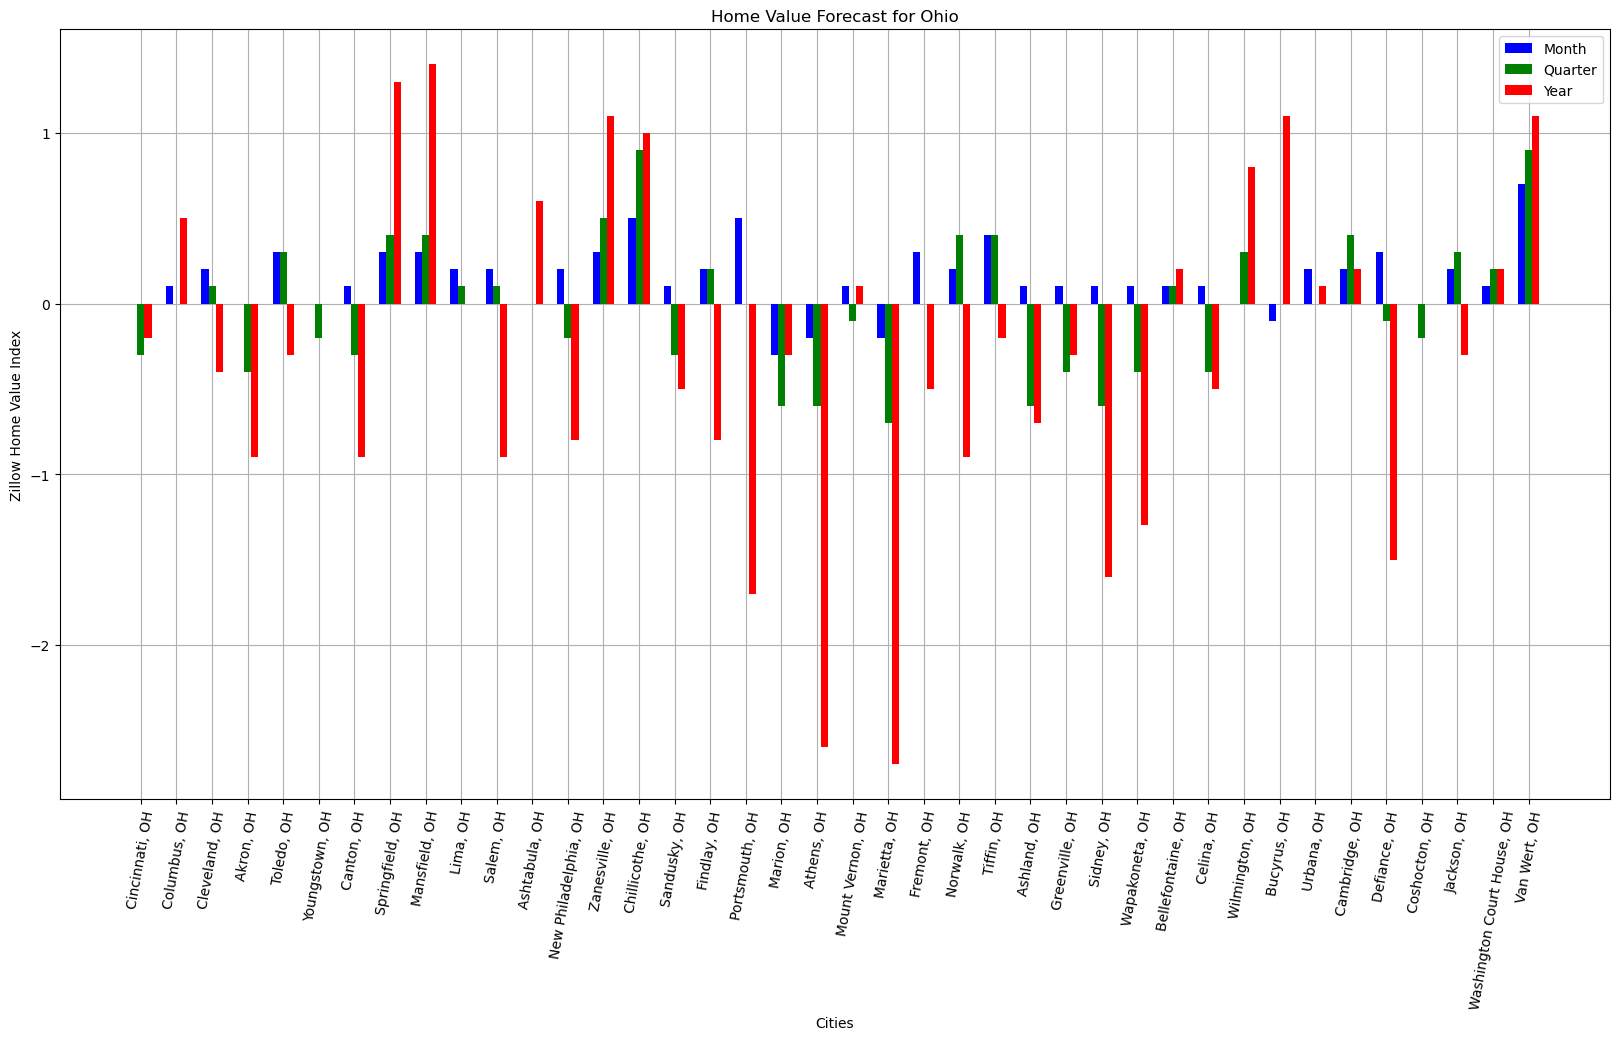

In [285]:
# Adjusting the size of the graph
plt.subplots(figsize=(20,10))

# Create bar graph
x_axis = np.arange(len(hvf_oh['12/31/2023']))
plt.bar(x_axis-0.2, hvf_oh['12/31/2023'], color="b", align="center", width=0.2, zorder = 3, label="Month")
plt.bar(x_axis, hvf_oh['2/29/2024'], color="g", align="center", width=0.2, zorder = 3, label="Quarter")
plt.bar(x_axis+0.2, hvf_oh['11/30/2024'], color="r", align="center", width=0.2, zorder = 3, label="Year")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, hvf_oh['RegionName'], rotation=80)

# Putting in grid lines
plt.grid(zorder=0)

# Set labels and title
plt.title("Home Value Forecast for Ohio")
plt.xlabel("Cities")
plt.ylabel("Zillow Home Value Index")
plt.legend(loc="best")

# Display the plot
plt.show()

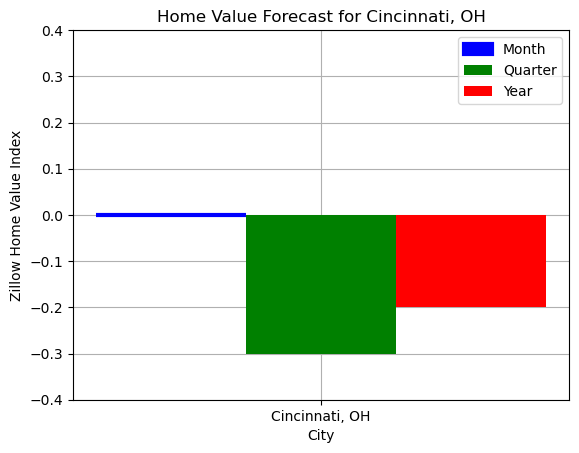

In [286]:
# Filtering the dataframe to just have data for Cincinnati
hvf_cincinnati = hvf_oh.loc[hvf_oh['RegionName'] == "Cincinnati, OH"]

# Create bar graph
x_axis = np.arange(len(hvf_cincinnati['12/31/2023']))
plt.bar(x_axis-0.2, hvf_cincinnati['12/31/2023'], color="b", edgecolor='b', linewidth=3, align="center", width=0.2, zorder = 3, label="Month")
plt.bar(x_axis, hvf_cincinnati['2/29/2024'], color="g", align="center", width=0.2, zorder = 3, label="Quarter")
plt.bar(x_axis+0.2, hvf_cincinnati['11/30/2024'], color="r", align="center", width=0.2, zorder = 3, label="Year")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, hvf_cincinnati['RegionName'], rotation='horizontal')

# Putting in grid lines
plt.grid(zorder=0)

# Set labels and title
plt.title("Home Value Forecast for Cincinnati, OH")
plt.xlabel("City")
plt.ylabel("Zillow Home Value Index")

# Adding a legend
plt.legend(loc="best")

# Adjusting the y-axis
plt.ylim(-0.40, max(hvf_cincinnati['12/31/2023'])+.40)

# Display the plot
plt.show()

In [287]:
display(metro_sales_count.head()) # The estimated number of unique properties that sold during the month

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,102001,0,United States,country,NaN,205206,238071,264215,290180,304596,...,236545,324071,299951,360423,381898,327706.0,356022.0,307974.0,291856.0,256938
1,394913,1,"New York, NY",msa,NY,8591,8967,9977,10232,10854,...,8915,11164,10446,12425,14692,13076.0,15184.0,12678.0,12449.0,10864
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,4634,6728,6033,7180,7319,6223.0,6964.0,5742.0,5791.0,4965
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,5744,8927,8633,10623,11254,9655.0,10521.0,8840.0,8601.0,7128
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,5294,6831,6500,7941,7816,6886.0,7067.0,5686.0,5283.0,4779


In [288]:
#Check column names
metro_sales_count.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2/29/2008', '3/31/2008', '4/30/2008', '5/31/2008', '6/30/2008',
       ...
       '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023', '6/30/2023',
       '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023', '11/30/2023'],
      dtype='object', length=195)

In [289]:
#Rename columns to make the csv more readable
metro_sales_count_renamed = metro_sales_count.rename(columns={'RegionID': 'Region ID',
                                                              'SizeRank': 'Size Rank',
                                                              'RegionName': 'Region Name',
                                                              'RegionType': 'Region Type',
                                                              'StateName': 'State',
                                                              })
metro_sales_count_renamed

,Region ID,Size Rank,Region Name,Region Type,State,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,102001,0,United States,country,NaN,205206,238071,264215,290180,304596,...,236545,324071,299951,360423,381898,327706.0,356022.0,307974.0,291856.0,256938
1,394913,1,"New York, NY",msa,NY,8591,8967,9977,10232,10854,...,8915,11164,10446,12425,14692,13076.0,15184.0,12678.0,12449.0,10864
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,4634,6728,6033,7180,7319,6223.0,6964.0,5742.0,5791.0,4965
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,5744,8927,8633,10623,11254,9655.0,10521.0,8840.0,8601.0,7128
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,5294,6831,6500,7941,7816,6886.0,7067.0,5686.0,5283.0,4779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,395006,92,"Provo, UT",msa,UT,363,353,454,450,445,...,464,578,585,636,626,592.0,606.0,494.0,436.0,410
90,395160,93,"Toledo, OH",msa,OH,336,365,442,479,488,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574
91,395224,94,"Wichita, KS",msa,KS,236,369,360,277,447,...,186,284,228,243,327,264.0,284.0,282.0,251.0,100
92,394549,95,"Durham, NC",msa,NC,418,528,556,792,794,...,478,747,683,785,907,675.0,736.0,639.0,588.0,530


In [290]:
#Drop columns with 'nan' values
metro_sales_count_renamed.dropna()

,Region ID,Size Rank,Region Name,Region Type,State,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,4634,6728,6033,7180,7319,6223.0,6964.0,5742.0,5791.0,4965
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,5744,8927,8633,10623,11254,9655.0,10521.0,8840.0,8601.0,7128
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,5294,6831,6500,7941,7816,6886.0,7067.0,5686.0,5283.0,4779
6,395209,6,"Washington, DC",msa,VA,4127,5017,5745,6236,7179,...,4647,6200,6179,7589,7799,6247.0,6511.0,5380.0,5232.0,4524
7,394974,7,"Philadelphia, PA",msa,PA,4173,4958,5730,5783,6458,...,4544,6253,5946,6813,7783,6583.0,7151.0,6159.0,5907.0,5472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,395006,92,"Provo, UT",msa,UT,363,353,454,450,445,...,464,578,585,636,626,592.0,606.0,494.0,436.0,410
90,395160,93,"Toledo, OH",msa,OH,336,365,442,479,488,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574
91,395224,94,"Wichita, KS",msa,KS,236,369,360,277,447,...,186,284,228,243,327,264.0,284.0,282.0,251.0,100
92,394549,95,"Durham, NC",msa,NC,418,528,556,792,794,...,478,747,683,785,907,675.0,736.0,639.0,588.0,530


In [291]:
#Filtered data set to only consider Ohio house sales
ohio_metro_sales_df = metro_sales_count_renamed.loc[(metro_sales_count_renamed['State'] == 'OH')]
ohio_metro_sales_df

,Region ID,Size Rank,Region Name,Region Type,State,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
28,394466,28,"Cincinnati, OH",msa,OH,1603,1873,1963,2276,2442,...,1659,2421,2225,2554,2941,2537.0,2603.0,2322.0,2307.0,2170
32,394492,32,"Columbus, OH",msa,OH,1267,1377,1488,1563,1731,...,1563,2011,1936,2310,2574,2124.0,2478.0,2005.0,2010.0,1766
34,394475,35,"Cleveland, OH",msa,OH,1257,1468,1605,1794,1952,...,1596,2079,1829,2435,2549,2178.0,2501.0,2283.0,2115.0,1985
81,394304,83,"Akron, OH",msa,OH,405,413,486,490,609,...,646,763,670,820,870,747.0,849.0,755.0,790.0,675
90,395160,93,"Toledo, OH",msa,OH,336,365,442,479,488,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574


In [292]:
#Dropped non-numerical columns
dates_data = ohio_metro_sales_df.drop(columns=['Region ID', 'Size Rank', 'Region Type','State', 'Region Name'])
dates_data

,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
28,1603,1873,1963,2276,2442,2305,2228,2113,2001,1447,...,1659,2421,2225,2554,2941,2537.0,2603.0,2322.0,2307.0,2170
32,1267,1377,1488,1563,1731,1675,1701,1494,1492,1024,...,1563,2011,1936,2310,2574,2124.0,2478.0,2005.0,2010.0,1766
34,1257,1468,1605,1794,1952,1857,1790,1830,1899,1451,...,1596,2079,1829,2435,2549,2178.0,2501.0,2283.0,2115.0,1985
81,405,413,486,490,609,560,596,578,569,397,...,646,763,670,820,870,747.0,849.0,755.0,790.0,675
90,336,365,442,479,488,496,473,451,466,374,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574


In [293]:
#Convert columns to datetime 
dates_data.columns = pd.to_datetime(dates_data.columns)
dates_data

,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,...,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30
28,1603,1873,1963,2276,2442,2305,2228,2113,2001,1447,...,1659,2421,2225,2554,2941,2537.0,2603.0,2322.0,2307.0,2170
32,1267,1377,1488,1563,1731,1675,1701,1494,1492,1024,...,1563,2011,1936,2310,2574,2124.0,2478.0,2005.0,2010.0,1766
34,1257,1468,1605,1794,1952,1857,1790,1830,1899,1451,...,1596,2079,1829,2435,2549,2178.0,2501.0,2283.0,2115.0,1985
81,405,413,486,490,609,560,596,578,569,397,...,646,763,670,820,870,747.0,849.0,755.0,790.0,675
90,336,365,442,479,488,496,473,451,466,374,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574


In [294]:
#Createing blank column for Dates to prepare to transpose columns
dates_data['Date'] = ''
dates_data

,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,...,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,Date
28,1603,1873,1963,2276,2442,2305,2228,2113,2001,1447,...,2421,2225,2554,2941,2537.0,2603.0,2322.0,2307.0,2170,
32,1267,1377,1488,1563,1731,1675,1701,1494,1492,1024,...,2011,1936,2310,2574,2124.0,2478.0,2005.0,2010.0,1766,
34,1257,1468,1605,1794,1952,1857,1790,1830,1899,1451,...,2079,1829,2435,2549,2178.0,2501.0,2283.0,2115.0,1985,
81,405,413,486,490,609,560,596,578,569,397,...,763,670,820,870,747.0,849.0,755.0,790.0,675,
90,336,365,442,479,488,496,473,451,466,374,...,553,640,671,789,634.0,757.0,566.0,640.0,574,


In [295]:
#Transposing the dataframe to set the dates as the index
dates_data_t = dates_data.set_index('Date').T
dates_data_t

Date,,,,,
2008-02-29,1603.0,1267.0,1257.0,405.0,336.0
2008-03-31,1873.0,1377.0,1468.0,413.0,365.0
2008-04-30,1963.0,1488.0,1605.0,486.0,442.0
2008-05-31,2276.0,1563.0,1794.0,490.0,479.0
2008-06-30,2442.0,1731.0,1952.0,609.0,488.0
...,...,...,...,...,...
2023-07-31,2537.0,2124.0,2178.0,747.0,634.0
2023-08-31,2603.0,2478.0,2501.0,849.0,757.0
2023-09-30,2322.0,2005.0,2283.0,755.0,566.0
2023-10-31,2307.0,2010.0,2115.0,790.0,640.0


In [296]:
#Turned 'Date' column into datetime and set it as the index
dates_data_t['Date'] = pd.to_datetime(dates_data_t.index)
dates_data_t.drop(columns='Date')
dates_data_t.set_index('Date', inplace=True)

In [297]:
#Resampled dataframe to turn monthly data into yearly data to reduce the noise on the line graph
dates_data_t.resample('Y').sum()

Date,,,,,
Date,,,,,
2008-12-31,21844.0,15992.0,18522.0,5598.0,4751.0
2009-12-31,22814.0,16552.0,18762.0,5996.0,5335.0
2010-12-31,20615.0,16775.0,17509.0,5127.0,5365.0
2011-12-31,21080.0,17146.0,17288.0,5503.0,5596.0
2012-12-31,24166.0,20757.0,20751.0,6583.0,6503.0
2013-12-31,29996.0,26430.0,23942.0,7840.0,7255.0
2014-12-31,29358.0,27370.0,23432.0,8104.0,7238.0
2015-12-31,31519.0,29189.0,26215.0,9402.0,7678.0
2016-12-31,35610.0,29872.0,28454.0,9898.0,8097.0


In [298]:
#Named blank columns
dates_data_t.columns = ['Cincinnati', 'Columbus', 'Cleveland', 'Akron', 'Toledo']
dates_data_t

,Cincinnati,Columbus,Cleveland,Akron,Toledo
Date,,,,,
2008-02-29,1603.0,1267.0,1257.0,405.0,336.0
2008-03-31,1873.0,1377.0,1468.0,413.0,365.0
2008-04-30,1963.0,1488.0,1605.0,486.0,442.0
2008-05-31,2276.0,1563.0,1794.0,490.0,479.0
2008-06-30,2442.0,1731.0,1952.0,609.0,488.0
...,...,...,...,...,...
2023-07-31,2537.0,2124.0,2178.0,747.0,634.0
2023-08-31,2603.0,2478.0,2501.0,849.0,757.0
2023-09-30,2322.0,2005.0,2283.0,755.0,566.0


Text(0, 0.5, 'Houses Sold')

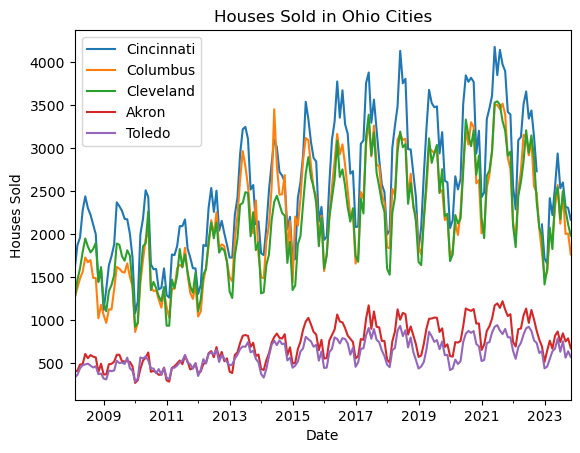

In [299]:
#Plotting the resampled data to examine yearly trends in housing sales.
dates_data_t.plot()
plt.title('Houses Sold in Ohio Cities')
plt.ylabel('Houses Sold')

Text(0.5, 1.0, 'Houses Sold')

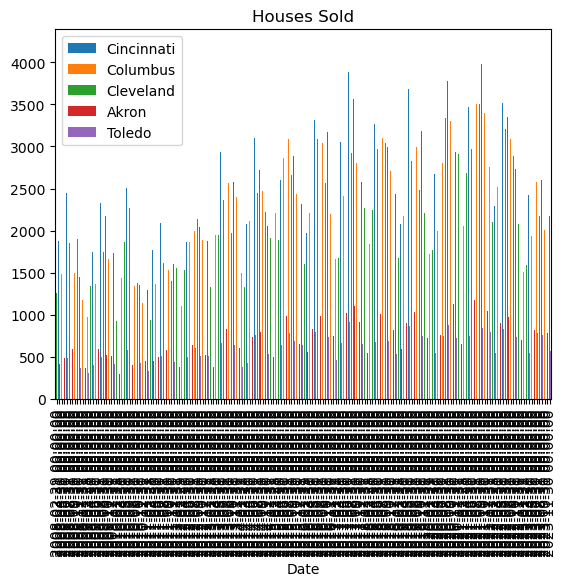

In [300]:
#Attempted to do a bar graph but the data was too convuluted.
dates_data_t.plot(kind='bar')
plt.title("Houses Sold")

In [301]:
#Isolated dates of Ohio "Stay at home" order. 
covid_study_ohio = ohio_metro_sales_df.loc[:, '1/31/2019':'12/31/2020']
covid_study_ohio

,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,...,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020
28,1829,2080,2689,3227,3680,3528,3478,3489,2942,3189,...,2675,2523,2643,3512.0,3849,3774,3821,3773,2940,3205
32,1853,1765,2170,2529,3005,2976,2945,2990,2492,2515,...,2137,1993,2263,2800.0,3194,3044,3304,3248,2593,2632
34,1680,1642,2171,2629,3116,2831,2943,3041,2481,2758,...,2225,2127,2183,2725.0,3335,3148,3025,3208,2693,2916
81,574,591,726,903,1018,1021,1032,1030,865,907,...,747,741,760,930.0,1138,1122,1110,1131,962,964
90,439,463,515,661,867,815,749,770,665,754,...,543,492,525,747.0,845,876,855,875,725,698


In [302]:
#Converting columns to datetime
covid_study_ohio.columns = pd.to_datetime(covid_study_ohio.columns).date
covid_study_ohio

,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,...,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
28,1829,2080,2689,3227,3680,3528,3478,3489,2942,3189,...,2675,2523,2643,3512.0,3849,3774,3821,3773,2940,3205
32,1853,1765,2170,2529,3005,2976,2945,2990,2492,2515,...,2137,1993,2263,2800.0,3194,3044,3304,3248,2593,2632
34,1680,1642,2171,2629,3116,2831,2943,3041,2481,2758,...,2225,2127,2183,2725.0,3335,3148,3025,3208,2693,2916
81,574,591,726,903,1018,1021,1032,1030,865,907,...,747,741,760,930.0,1138,1122,1110,1131,962,964
90,439,463,515,661,867,815,749,770,665,754,...,543,492,525,747.0,845,876,855,875,725,698


In [303]:
#Crete new column for 'Date'
covid_study_ohio['Date'] = ''
covid_study_ohio

,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,Date
28,1829,2080,2689,3227,3680,3528,3478,3489,2942,3189,...,2523,2643,3512.0,3849,3774,3821,3773,2940,3205,
32,1853,1765,2170,2529,3005,2976,2945,2990,2492,2515,...,1993,2263,2800.0,3194,3044,3304,3248,2593,2632,
34,1680,1642,2171,2629,3116,2831,2943,3041,2481,2758,...,2127,2183,2725.0,3335,3148,3025,3208,2693,2916,
81,574,591,726,903,1018,1021,1032,1030,865,907,...,741,760,930.0,1138,1122,1110,1131,962,964,
90,439,463,515,661,867,815,749,770,665,754,...,492,525,747.0,845,876,855,875,725,698,


In [304]:
#Transpose data and set 'Date' column as index.
covid_study_ohio = covid_study_ohio.set_index('Date').T
covid_study_ohio.head()

Date,,,,,
2019-01-31,1829.0,1853.0,1680.0,574.0,439.0
2019-02-28,2080.0,1765.0,1642.0,591.0,463.0
2019-03-31,2689.0,2170.0,2171.0,726.0,515.0
2019-04-30,3227.0,2529.0,2629.0,903.0,661.0
2019-05-31,3680.0,3005.0,3116.0,1018.0,867.0


In [305]:
#Name blank columns
covid_study_ohio.columns = ['Cincinnati', 'Columbus', 'Cleveland', 'Akron', 'Toledo']
covid_study_ohio.index.name = 'Date'
covid_study_ohio.head()

,Cincinnati,Columbus,Cleveland,Akron,Toledo
Date,,,,,
2019-01-31,1829.0,1853.0,1680.0,574.0,439.0
2019-02-28,2080.0,1765.0,1642.0,591.0,463.0
2019-03-31,2689.0,2170.0,2171.0,726.0,515.0
2019-04-30,3227.0,2529.0,2629.0,903.0,661.0
2019-05-31,3680.0,3005.0,3116.0,1018.0,867.0


In [306]:
#Set x axis and tick locations for Ohio covid lockdown data (for Cincinnati)
x_axis = np.arange(len(covid_study_ohio['Cincinnati']))
tick_locations = [value for value in x_axis]

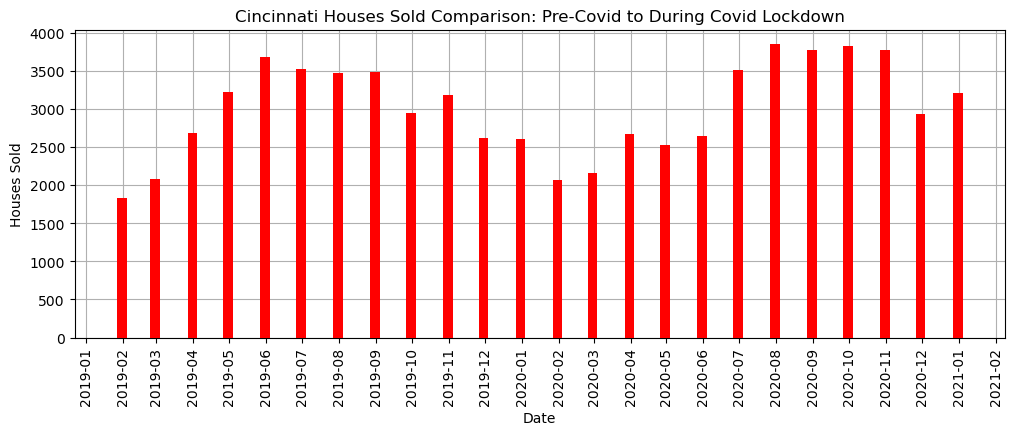

In [307]:
# Set figure size
plt.figure(figsize=(12, 4))

# Plot the bar graph for a specific city (e.g., Cincinnati)
plt.bar(covid_study_ohio.index, covid_study_ohio['Cincinnati'], color='r', alpha=1, align='center', width=8, zorder=3)
plt.grid(zorder=0)

# Customize x-axis ticks
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation='vertical')

# Set labels and title
plt.title("Cincinnati Houses Sold Comparison: Pre-Covid to During Covid Lockdown")
plt.xlabel('Date')
plt.ylabel('Houses Sold')

# Show the plot
plt.show()

In [308]:
#Exploring the effect of the Covid-19 shut down on home sales
#Filtering for California house sales
california_sales_df = metro_sales_count_renamed.loc[(metro_sales_count_renamed['State'] == 'CA')]
california_sales_df

,Region ID,Size Rank,Region Name,Region Type,State,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,4634,6728,6033,7180,7319,6223.0,6964.0,5742.0,5791.0,4965
12,395057,12,"San Francisco, CA",msa,CA,2355,3107,3893,4278,4552,...,1945,2931,2749,3567,3306,2815.0,2980.0,2715.0,2803.0,2296
13,395025,13,"Riverside, CA",msa,CA,2595,3429,3927,4748,4995,...,3243,4339,3989,4801,4635,3858.0,4070.0,3587.0,3430.0,2861
17,395056,17,"San Diego, CA",msa,CA,1462,1677,2280,2624,2563,...,1902,2548,2372,2668,2553,2440.0,2545.0,2076.0,1971.0,1636
26,395045,26,"Sacramento, CA",msa,CA,1463,1772,2286,2637,2934,...,1490,1972,1798,2371,2285,1968.0,2297.0,1978.0,1825.0,1390
35,395059,36,"San Jose, CA",msa,CA,730,924,1099,1273,1395,...,660,1096,1002,1369,1305,1038.0,1187.0,1019.0,1059.0,837
56,394619,57,"Fresno, CA",msa,CA,322,405,517,555,600,...,518,623,594,688,716,634.0,659.0,570.0,618.0,450
62,394357,63,"Bakersfield, CA",msa,CA,439,513,629,723,772,...,564,785,665,775,778,721.0,802.0,661.0,680.0,546
70,394952,71,"Oxnard, CA",msa,CA,391,428,624,588,656,...,383,591,554,626,581,520.0,615.0,483.0,473.0,384
75,395134,77,"Stockton, CA",msa,CA,379,511,698,839,976,...,364,520,426,603,531,515.0,489.0,478.0,433.0,305


In [309]:
#Transposing date columns to become the index
covid_study_california = california_sales_df.loc[:, '1/31/2019':'12/31/2021']
covid_study_california.columns = pd.to_datetime(covid_study_california.columns).date
covid_study_california['Date'] = ''
covid_study_california = covid_study_california.set_index('Date').T
covid_study_california

Date,,,,,,,,,,
2019-01-31,5796.0,2171.0,3952.0,1867.0,1816.0,724.0,640.0,720.0,511.0,471.0
2019-02-28,6162.0,2537.0,4028.0,2247.0,2094.0,873.0,574.0,629.0,540.0,511.0
2019-03-31,8224.0,3594.0,5341.0,2863.0,2646.0,1290.0,807.0,865.0,674.0,636.0
2019-04-30,9334.0,4253.0,6000.0,3374.0,2979.0,1446.0,871.0,982.0,842.0,690.0
2019-05-31,10342.0,4979.0,6567.0,3654.0,3453.0,1666.0,991.0,963.0,922.0,816.0
2019-06-30,9733.0,4328.0,5969.0,3359.0,3195.0,1420.0,909.0,910.0,916.0,746.0
2019-07-31,10049.0,4307.0,6522.0,3664.0,3430.0,1446.0,991.0,1071.0,948.0,816.0
2019-08-31,10204.0,4163.0,6288.0,3544.0,3246.0,1418.0,974.0,1158.0,931.0,788.0
2019-09-30,8906.0,3469.0,5560.0,3168.0,2768.0,1171.0,838.0,1011.0,811.0,671.0
2019-10-31,9467.0,4446.0,5994.0,3279.0,3086.0,1345.0,933.0,962.0,895.0,830.0


In [310]:
#Renaming Columns
covid_study_california.columns = ['Los Angeles', 'San Francisco', 'Riverside', 'San Diego', 'Sacramento', 'San Jose', 'Fresno', 'Bakersfield', 'Oxnard', 'Stockton']
covid_study_california.index.name = 'Date'
covid_study_california.head()

,Los Angeles,San Francisco,Riverside,San Diego,Sacramento,San Jose,Fresno,Bakersfield,Oxnard,Stockton
Date,,,,,,,,,,
2019-01-31,5796.0,2171.0,3952.0,1867.0,1816.0,724.0,640.0,720.0,511.0,471.0
2019-02-28,6162.0,2537.0,4028.0,2247.0,2094.0,873.0,574.0,629.0,540.0,511.0
2019-03-31,8224.0,3594.0,5341.0,2863.0,2646.0,1290.0,807.0,865.0,674.0,636.0
2019-04-30,9334.0,4253.0,6000.0,3374.0,2979.0,1446.0,871.0,982.0,842.0,690.0
2019-05-31,10342.0,4979.0,6567.0,3654.0,3453.0,1666.0,991.0,963.0,922.0,816.0


In [311]:
#Set x axis and tick locations for California chart
x_axis = np.arange(len(covid_study_california['Los Angeles']))
tick_locations = [value for value in x_axis]

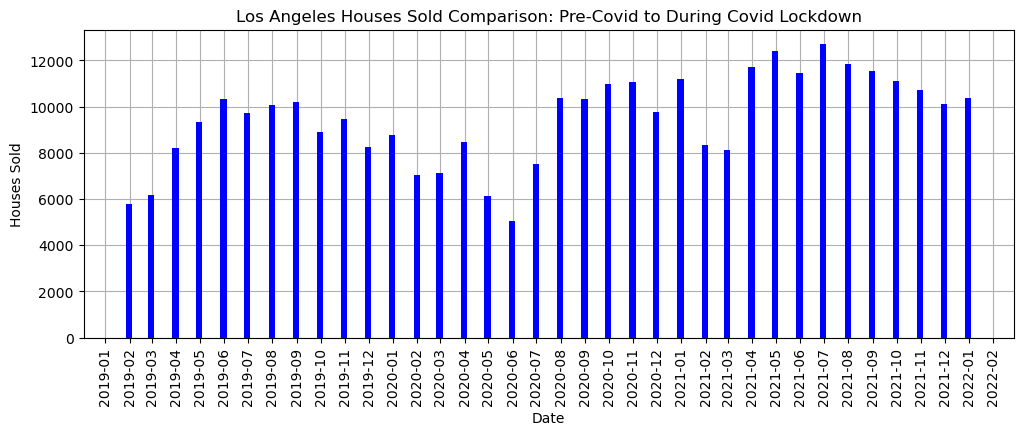

In [312]:
#Creating bar graph for California data
plt.figure(figsize=(12, 4))

plt.bar(covid_study_california.index, covid_study_california['Los Angeles'], color='b', alpha=1, align='center', width=8, zorder=3)
plt.grid(zorder=0)

plt.gca().xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation='vertical')

plt.title("Los Angeles Houses Sold Comparison: Pre-Covid to During Covid Lockdown")
plt.xlabel('Date')
plt.ylabel('Houses Sold')

plt.show()

In [313]:
#Exploring New York City data
covid_study_nyc = metro_sales_count_renamed.loc[(metro_sales_count_renamed['State'] == 'NY')]
covid_study_nyc

,Region ID,Size Rank,Region Name,Region Type,State,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
1,394913,1,"New York, NY",msa,NY,8591,8967,9977,10232,10854,...,8915,11164,10446,12425,14692,13076.0,15184.0,12678.0,12449.0,10864
49,394425,50,"Buffalo, NY",msa,NY,675,743,870,930,1122,...,576,629,600,834,988,979.0,1137.0,1059.0,891.0,923
51,395031,52,"Rochester, NY",msa,NY,741,812,1025,1238,1339,...,521,731,678,925,1156,1078.0,1201.0,1129.0,990.0,984
63,394308,64,"Albany, NY",msa,NY,358,403,439,515,616,...,489,675,607,664,784,719.0,925.0,763.0,751.0,726
88,395143,91,"Syracuse, NY",msa,NY,411,430,501,608,748,...,319,371,317,475,543,552.0,647.0,580.0,628.0,532


In [314]:
#Transposing New York data
covid_study_nyc = covid_study_nyc.loc[:, '1/31/2019':'12/31/2021']
covid_study_nyc.columns = pd.to_datetime(covid_study_nyc.columns).date
covid_study_nyc['Date'] = ''
covid_study_nyc = covid_study_nyc.set_index('Date').T
covid_study_nyc

Date,,,,,
2019-01-31,14390.0,785.0,828.0,481.0,503.0
2019-02-28,11983.0,657.0,763.0,407.0,387.0
2019-03-31,14232.0,867.0,937.0,477.0,461.0
2019-04-30,15094.0,883.0,1105.0,555.0,531.0
2019-05-31,17451.0,1091.0,1324.0,655.0,673.0
2019-06-30,18513.0,1091.0,1385.0,659.0,763.0
2019-07-31,20217.0,1273.0,1567.0,762.0,844.0
2019-08-31,20326.0,1394.0,1700.0,797.0,841.0
2019-09-30,17239.0,1218.0,1358.0,650.0,785.0
2019-10-31,17836.0,1217.0,1343.0,683.0,829.0


In [315]:
#Renaming Columns
covid_study_nyc.columns = ['New York', 'Buffalo', 'Rochester', 'Albany', 'Syracuse']
covid_study_nyc.index.name = 'Date'
covid_study_nyc.head()

,New York,Buffalo,Rochester,Albany,Syracuse
Date,,,,,
2019-01-31,14390.0,785.0,828.0,481.0,503.0
2019-02-28,11983.0,657.0,763.0,407.0,387.0
2019-03-31,14232.0,867.0,937.0,477.0,461.0
2019-04-30,15094.0,883.0,1105.0,555.0,531.0
2019-05-31,17451.0,1091.0,1324.0,655.0,673.0


In [316]:
#Set x axis and tick locations
x_axis = np.arange(len(covid_study_nyc['New York']))
tick_locations = [value for value in x_axis]

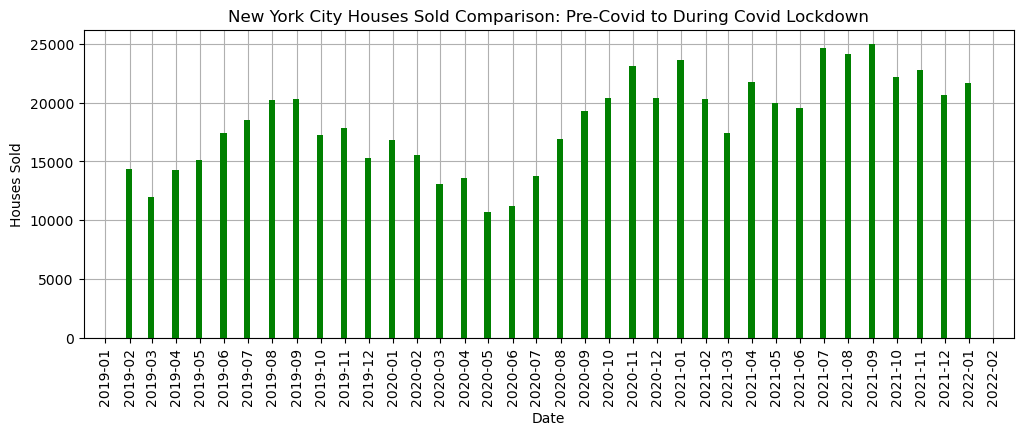

In [317]:
#Creating bar graph
plt.figure(figsize=(12, 4))

plt.bar(covid_study_nyc.index, covid_study_nyc['New York'], color='g', alpha=1, align='center', width=8, zorder=3)
plt.grid(zorder=0)

plt.gca().xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation='vertical')

plt.title("New York City Houses Sold Comparison: Pre-Covid to During Covid Lockdown")
plt.xlabel('Date')
plt.ylabel('Houses Sold')

plt.show()

In [318]:
covid_study_ohio.head()

,Cincinnati,Columbus,Cleveland,Akron,Toledo
Date,,,,,
2019-01-31,1829.0,1853.0,1680.0,574.0,439.0
2019-02-28,2080.0,1765.0,1642.0,591.0,463.0
2019-03-31,2689.0,2170.0,2171.0,726.0,515.0
2019-04-30,3227.0,2529.0,2629.0,903.0,661.0
2019-05-31,3680.0,3005.0,3116.0,1018.0,867.0


In [319]:
covid_study_california.head()

,Los Angeles,San Francisco,Riverside,San Diego,Sacramento,San Jose,Fresno,Bakersfield,Oxnard,Stockton
Date,,,,,,,,,,
2019-01-31,5796.0,2171.0,3952.0,1867.0,1816.0,724.0,640.0,720.0,511.0,471.0
2019-02-28,6162.0,2537.0,4028.0,2247.0,2094.0,873.0,574.0,629.0,540.0,511.0
2019-03-31,8224.0,3594.0,5341.0,2863.0,2646.0,1290.0,807.0,865.0,674.0,636.0
2019-04-30,9334.0,4253.0,6000.0,3374.0,2979.0,1446.0,871.0,982.0,842.0,690.0
2019-05-31,10342.0,4979.0,6567.0,3654.0,3453.0,1666.0,991.0,963.0,922.0,816.0


In [320]:
covid_study_nyc.head()

,New York,Buffalo,Rochester,Albany,Syracuse
Date,,,,,
2019-01-31,14390.0,785.0,828.0,481.0,503.0
2019-02-28,11983.0,657.0,763.0,407.0,387.0
2019-03-31,14232.0,867.0,937.0,477.0,461.0
2019-04-30,15094.0,883.0,1105.0,555.0,531.0
2019-05-31,17451.0,1091.0,1324.0,655.0,673.0


In [321]:
covid_sales_df = pd.merge(covid_study_ohio, covid_study_california, left_index=True, right_index=True)
covid_sales_df = pd.merge(covid_sales_df, covid_study_nyc, left_index=True, right_index=True)
covid_sales_df.head()

,Cincinnati,Columbus,Cleveland,Akron,Toledo,Los Angeles,San Francisco,Riverside,San Diego,Sacramento,San Jose,Fresno,Bakersfield,Oxnard,Stockton,New York,Buffalo,Rochester,Albany,Syracuse
Date,,,,,,,,,,,,,,,,,,,,
2019-01-31,1829.0,1853.0,1680.0,574.0,439.0,5796.0,2171.0,3952.0,1867.0,1816.0,724.0,640.0,720.0,511.0,471.0,14390.0,785.0,828.0,481.0,503.0
2019-02-28,2080.0,1765.0,1642.0,591.0,463.0,6162.0,2537.0,4028.0,2247.0,2094.0,873.0,574.0,629.0,540.0,511.0,11983.0,657.0,763.0,407.0,387.0
2019-03-31,2689.0,2170.0,2171.0,726.0,515.0,8224.0,3594.0,5341.0,2863.0,2646.0,1290.0,807.0,865.0,674.0,636.0,14232.0,867.0,937.0,477.0,461.0
2019-04-30,3227.0,2529.0,2629.0,903.0,661.0,9334.0,4253.0,6000.0,3374.0,2979.0,1446.0,871.0,982.0,842.0,690.0,15094.0,883.0,1105.0,555.0,531.0
2019-05-31,3680.0,3005.0,3116.0,1018.0,867.0,10342.0,4979.0,6567.0,3654.0,3453.0,1666.0,991.0,963.0,922.0,816.0,17451.0,1091.0,1324.0,655.0,673.0


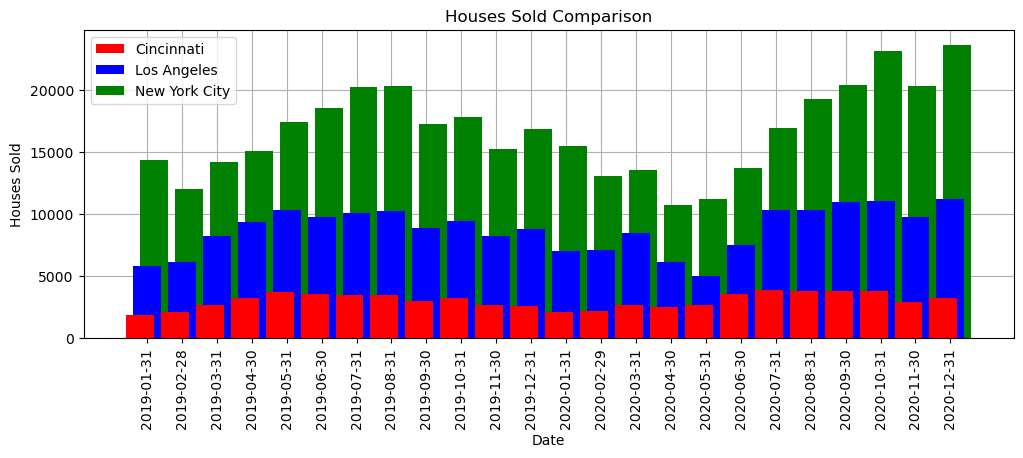

In [322]:
#Graphing the merged data sets
import matplotlib.dates as mdates

x_axis = np.arange(len(covid_sales_df))
plt.figure(figsize=(12, 4))
plt.bar(x_axis-0.2, covid_sales_df['Cincinnati'], color='r', align='center',width=0.8, zorder=4, label='Cincinnati')
plt.bar(x_axis, covid_sales_df['Los Angeles'], color='b', align='center',width=0.8, zorder=3, label='Los Angeles')
plt.bar(x_axis+0.2, covid_sales_df['New York'], color='g', align='center',width=0.8, zorder=2, label='New York City')
plt.grid(zorder=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(x_axis, covid_sales_df.index, rotation='vertical')
plt.legend()
plt.title("Houses Sold Comparison")
plt.xlabel('Date')
plt.ylabel('Houses Sold')

plt.show()

In [48]:
## New Construction Sales Data

In [49]:
## Merging sales and new construction sales to compaire 
merged_sales_newcon = pd.merge(metro_sales_count, new_construction_sales, on="RegionName")
merged_sales_newcon.head()

,RegionID_x,SizeRank_x,RegionName,RegionType_x,StateName_x,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,1/31/2023_y,2/28/2023_y,3/31/2023_y,4/30/2023_y,5/31/2023_y,6/30/2023_y,7/31/2023_y,8/31/2023_y,9/30/2023_y,10/31/2023_y
0,102001,0,United States,country,NaN,205206,238071,264215,290180,304596,...,24569.0,31273.0,42895.0,37818.0,42978.0,42341.0,34096.0,37166.0,33917.0,31641.0
1,394913,1,"New York, NY",msa,NY,8591,8967,9977,10232,10854,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0


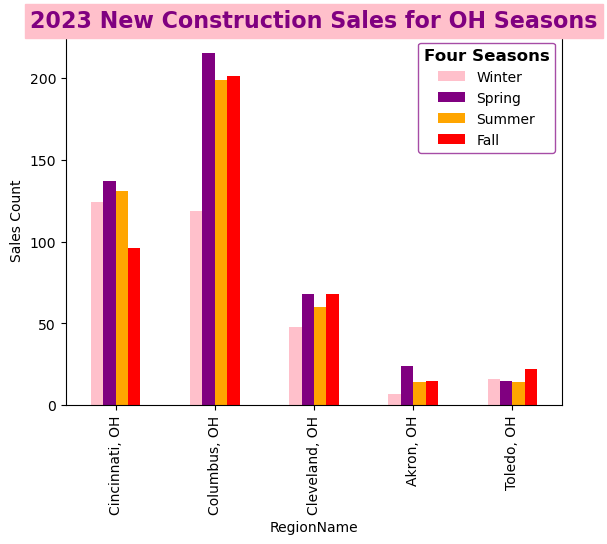

In [50]:
##MERGING METRO SALES AND NEW CONSTRUCTION!!!!!!!!!!!!!!!!!! <3 <3 <3 
#this is just new construction sales that i showcased because i just pulled "_y" data and that is just the new construction data not the metro sales 

## Makeing a bar chart to show 2023 all four season sales for new construction sales 

# Read datasets
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")

# Merge datasets on 'RegionName'
merged_data = pd.merge(metro_sales_count, new_construction_sales, on="RegionName")

# Filter for 'OH' RegionName
oh_data = merged_data[merged_data['StateName_x'] == 'OH']

# Plot bar chart
oh_data.plot(kind='bar', x='RegionName', y=['1/31/2023_y','4/30/2023_y', '8/31/2023_y','10/31/2023_y'], color=['pink','purple', 'orange','red'])
legend = plt.legend(['Winter', 'Spring', 'Summer', 'Fall'], loc='upper right', title='Four Seasons', fancybox=True, framealpha=0.7, edgecolor='purple')
legend.get_title().set_fontsize('12')
legend.get_title().set_fontweight('bold')
#plt.title('Metro Sales and New Construction Sales for OH Seasons')
plt.title('2023 New Construction Sales for OH Seasons', fontsize=16, color='purple', fontweight='bold', backgroundcolor='pink')
plt.xlabel('RegionName')
plt.ylabel('Sales Count')
plt.show()

In [ ]:
#New Construction Winter Sales 

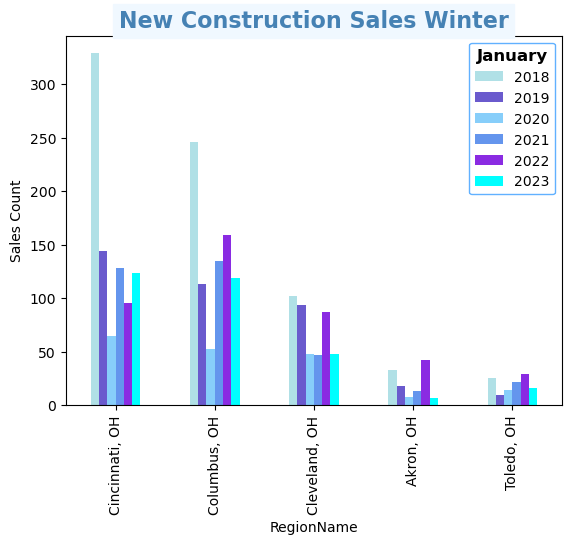

In [51]:
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")

# Merge datasets on 'RegionName'
merged_data = pd.merge(metro_sales_count, new_construction_sales, on="RegionName")

# Filter for 'OH' RegionName
oh_data = merged_data[merged_data['StateName_x'] == 'OH']

# Plot bar chart
oh_data.plot(kind='bar', x='RegionName', y=['1/31/2018_y','1/31/2019_y', '1/31/2020_y','1/31/2021_y', '1/31/2022_y', '1/31/2023_y'], color=['powderblue','slateblue', 'lightskyblue','cornflowerblue', 'blueviolet', 'cyan' ])
legend = plt.legend(['2018', '2019', '2020', '2021', '2022', '2023'], loc='upper right', title='January', fancybox=True, framealpha=0.7, edgecolor='dodgerblue')
legend.get_title().set_fontsize('12')
legend.get_title().set_fontweight('bold')
#plt.title('Metro Sales and New Construction Sales for OH Seasons')
plt.title('New Construction Sales Winter', fontsize=16, color='steelblue', fontweight='bold', backgroundcolor='aliceblue')
plt.xlabel('RegionName')
plt.ylabel('Sales Count')
plt.show()

In [ ]:
## New Construction Spring Sales 

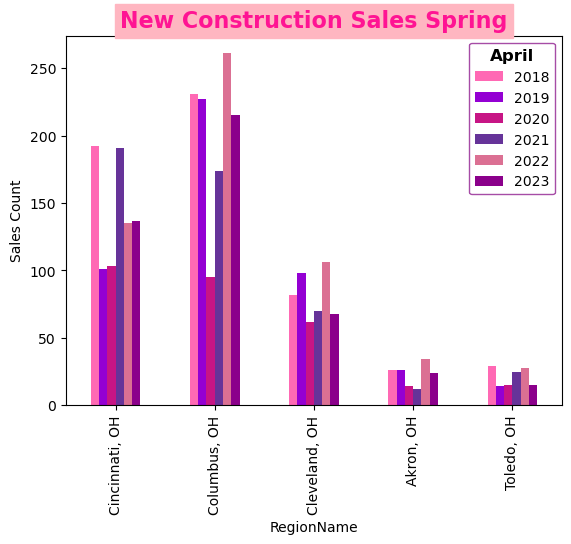

In [52]:
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")

# Merge datasets on 'RegionName'
merged_data = pd.merge(metro_sales_count, new_construction_sales, on="RegionName")

# Filter for 'OH' RegionName
oh_data = merged_data[merged_data['StateName_x'] == 'OH']

# Plot bar chart
oh_data.plot(kind='bar', x='RegionName', y=['4/30/2018_y','4/30/2019_y', '4/30/2020_y','4/30/2021_y', '4/30/2022_y', '4/30/2023_y'], color=['hotpink','darkviolet', 'mediumvioletred','rebeccapurple', 'palevioletred', 'darkmagenta' ])
legend = plt.legend(['2018', '2019', '2020', '2021', '2022', '2023'], loc='upper right', title='April', fancybox=True, framealpha=0.7, edgecolor='purple')
legend.get_title().set_fontsize('12')
legend.get_title().set_fontweight('bold')
#plt.title('Metro Sales and New Construction Sales for OH Seasons')
plt.title('New Construction Sales Spring', fontsize=16, color='deeppink', fontweight='bold', backgroundcolor='lightpink')
plt.xlabel('RegionName')
plt.ylabel('Sales Count')
plt.show()

In [53]:
## New Construction Sales Summer 

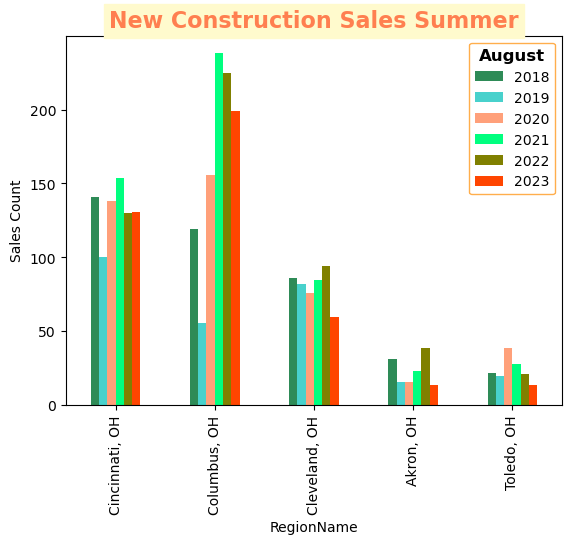

In [54]:
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")

# Merge datasets on 'RegionName'
merged_data = pd.merge(metro_sales_count, new_construction_sales, on="RegionName")

# Filter for 'OH' RegionName
oh_data = merged_data[merged_data['StateName_x'] == 'OH']

# Plot bar chart
oh_data.plot(kind='bar', x='RegionName', y=['8/31/2018_y','8/31/2019_y', '8/31/2020_y','8/31/2021_y', '8/31/2022_y', '8/31/2023_y'], color=['seagreen','mediumturquoise', 'lightsalmon','springgreen', 'olive', 'orangered' ])
legend = plt.legend(['2018', '2019', '2020', '2021', '2022', '2023'], loc='upper right', title='August', fancybox=True, framealpha=0.7, edgecolor='darkorange')
legend.get_title().set_fontsize('12')
legend.get_title().set_fontweight('bold')
#plt.title('Metro Sales and New Construction Sales for OH Seasons')
plt.title('New Construction Sales Summer', fontsize=16, color='coral', fontweight='bold', backgroundcolor='lemonchiffon')
plt.xlabel('RegionName')
plt.ylabel('Sales Count')
plt.show()

In [55]:
## New Construction Fall Sales

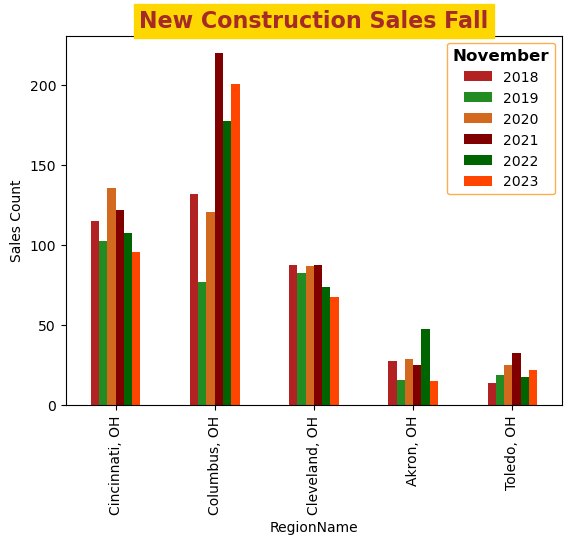

In [56]:
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")

# Merge datasets on 'RegionName'
merged_data = pd.merge(metro_sales_count, new_construction_sales, on="RegionName")

# Filter for 'OH' RegionName
oh_data = merged_data[merged_data['StateName_x'] == 'OH']

# Plot bar chart
oh_data.plot(kind='bar', x='RegionName', y=['10/31/2018_y','10/31/2019_y', '10/31/2020_y','10/31/2021_y', '10/31/2022_y', '10/31/2023_y'], color=['firebrick','forestgreen', 'chocolate','maroon', 'darkgreen', 'orangered' ])
legend = plt.legend(['2018', '2019', '2020', '2021', '2022', '2023'], loc='upper right', title='November', fancybox=True, framealpha=0.7, edgecolor='darkorange')
legend.get_title().set_fontsize('12')
legend.get_title().set_fontweight('bold')
#plt.title('Metro Sales and New Construction Sales for OH Seasons')
plt.title('New Construction Sales Fall', fontsize=16, color='brown', fontweight='bold', backgroundcolor='gold')
plt.xlabel('RegionName')
plt.ylabel('Sales Count')
plt.show()

# Getting some general information on our dataset

In [58]:
zestimate.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,394466,28,"Cincinnati, OH",msa,OH,123285.59080,123248.6175,123190.11390,123465.08810,123998.75980,...,256429.8895,257186.0028,258907.0016,261391.1562,263944.2553,266223.3256,267886.2660,268921.0643,269405.3712,269668.9344
1,394492,32,"Columbus, OH",msa,OH,122802.19670,122909.1501,123081.82620,123429.69540,123850.70580,...,284776.9682,285236.2615,286804.2594,288978.0312,291477.0123,293844.5102,295975.9036,297656.6676,298865.4308,299588.3884
2,394475,35,"Cleveland, OH",msa,OH,115713.93960,115883.6149,116056.98890,116418.73980,116976.62730,...,202291.0216,202583.4009,203810.8053,205405.5919,207243.7700,209038.5210,210793.6855,212232.2111,213380.3142,214136.1425
3,394304,83,"Akron, OH",msa,OH,106289.14790,106456.4836,106577.02750,106875.41180,107149.62400,...,194782.3361,195229.4814,196585.1946,198324.0854,200149.8978,201907.0226,203367.1560,204596.9838,205441.5261,206093.6075
4,395160,93,"Toledo, OH",msa,OH,83501.85695,83582.9768,83699.29069,84039.18756,84556.47498,...,165502.3824,165836.6763,167074.6010,168790.1211,170897.0878,173017.8861,174626.7266,175847.7469,176854.7346,177813.3466


In [59]:
zestimate.describe

<bound method NDFrame.describe of     RegionID  SizeRank                  RegionName RegionType StateName  \
0     394466        28              Cincinnati, OH        msa        OH   
1     394492        32                Columbus, OH        msa        OH   
2     394475        35               Cleveland, OH        msa        OH   
3     394304        83                   Akron, OH        msa        OH   
4     395160        93                  Toledo, OH        msa        OH   
5     395245       106              Youngstown, OH        msa        OH   
6     394439       137                  Canton, OH        msa        OH   
7     394697       151              Huntington, WV        msa        OH   
8     395221       309                Wheeling, WV        msa        OH   
9     395117       316             Springfield, OH        msa        OH   
10    394824       337               Mansfield, OH        msa        OH   
11    395217       353                 Weirton, WV        msa     

In [60]:
zestimate.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2000', '2/29/2000', '3/31/2000', '4/30/2000', '5/31/2000',
       ...
       '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023', '6/30/2023',
       '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023', '11/30/2023'],
      dtype='object', length=292)

In [61]:
zestimate = pd.read_csv('./Zillow Housing Estimate Index - Sheet1.csv') 

# Filter columns from 2023
cols_2023 = [col for col in zestimate.columns if '2023' in col]
cols = ['RegionName'] + cols_2023

# Create a new DataFrame with only the filtered columns
df_filtered = zestimate[cols]

# Calculate the mean for each city in 2023
df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)

# Print the mean values
print(df_filtered[['RegionName', 'Mean_2023']])

                    RegionName      Mean_2023
0               Cincinnati, OH  263305.138409
1                 Columbus, OH  291657.197700
2                Cleveland, OH  207579.830264
3                    Akron, OH  200133.371536
4                   Toledo, OH  171100.921282
5               Youngstown, OH  143095.933345
6                   Canton, OH  184023.719445
7               Huntington, WV  138880.634355
8                 Wheeling, WV  132205.102573
9              Springfield, OH  166914.659091
10               Mansfield, OH  161986.275973
11                 Weirton, WV  119279.330036
12                    Lima, OH  161689.499136
13                   Salem, OH  140488.626800
14               Ashtabula, OH  157913.766209
15        New Philadelphia, OH  181300.551155
16              Zanesville, OH  171604.079818
17             Chillicothe, OH  184326.868127
18                Sandusky, OH  200260.119964
19                 Findlay, OH  210528.674400
20              Portsmouth, OH  11

C:\Users\ishak\AppData\Local\Temp\ipykernel_16464\3271143950.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)


# Plotting each city to visualize trajectory

In [62]:
zestimate_mean = pd.read_csv('./Zillow Housing Estimate Index - Sheet1.csv') 

# Filter columns from 2023
cols_2023 = [col for col in zestimate.columns if '2023' in col]
cols = ['RegionName'] + cols_2023

# Create a new DataFrame with only the filtered columns
df_filtered = zestimate[cols]

# Calculate the mean for each city in 2023
df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)

# Print the mean values
print(df_filtered[['RegionName', 'Mean_2023']])

                    RegionName      Mean_2023
0               Cincinnati, OH  263305.138409
1                 Columbus, OH  291657.197700
2                Cleveland, OH  207579.830264
3                    Akron, OH  200133.371536
4                   Toledo, OH  171100.921282
5               Youngstown, OH  143095.933345
6                   Canton, OH  184023.719445
7               Huntington, WV  138880.634355
8                 Wheeling, WV  132205.102573
9              Springfield, OH  166914.659091
10               Mansfield, OH  161986.275973
11                 Weirton, WV  119279.330036
12                    Lima, OH  161689.499136
13                   Salem, OH  140488.626800
14               Ashtabula, OH  157913.766209
15        New Philadelphia, OH  181300.551155
16              Zanesville, OH  171604.079818
17             Chillicothe, OH  184326.868127
18                Sandusky, OH  200260.119964
19                 Findlay, OH  210528.674400
20              Portsmouth, OH  11

C:\Users\ishak\AppData\Local\Temp\ipykernel_16464\66808280.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)


# Getting the mean of each city in dataframe format

In [63]:
# Create a new DataFrame with the region names and their mean values
mean_df = df_filtered[['RegionName', 'Mean_2023']].copy()

In [64]:
mean_df.head()

,RegionName,Mean_2023
0,"Cincinnati, OH",263305.138409
1,"Columbus, OH",291657.197700
2,"Cleveland, OH",207579.830264
3,"Akron, OH",200133.371536
4,"Toledo, OH",171100.921282


# Plotting the mean for each city

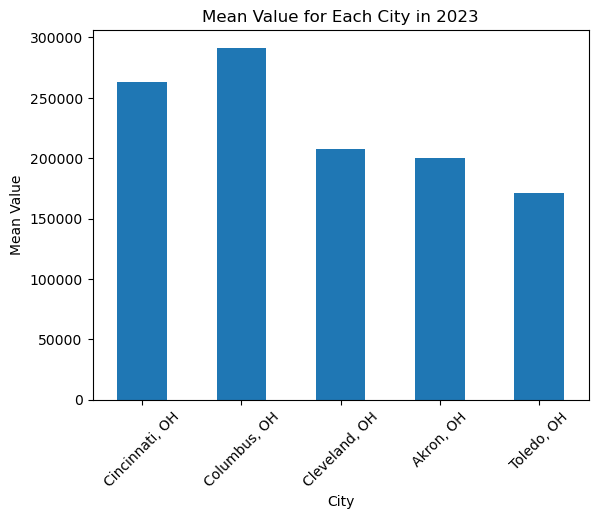

In [65]:
# Assuming mean_df is your DataFrame
mean_df = pd.DataFrame({
    'RegionName': ['Cincinnati, OH', 'Columbus, OH', 'Cleveland, OH', 'Akron, OH', 'Toledo, OH'],
    'Mean_2023': [263305.138409, 291657.197700, 207579.830264, 200133.371536, 171100.921282]
})

# Plotting and labeling
mean_df.plot(kind='bar', x='RegionName', y='Mean_2023', legend=False)
plt.xlabel('City')
plt.ylabel('Mean Value')
plt.title('Mean Value for Each City in 2023')
plt.xticks(rotation=45)
plt.show()

# Dataframe of the mean zestimate for each city

In [66]:
zestimate.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,394466,28,"Cincinnati, OH",msa,OH,123285.59080,123248.6175,123190.11390,123465.08810,123998.75980,...,256429.8895,257186.0028,258907.0016,261391.1562,263944.2553,266223.3256,267886.2660,268921.0643,269405.3712,269668.9344
1,394492,32,"Columbus, OH",msa,OH,122802.19670,122909.1501,123081.82620,123429.69540,123850.70580,...,284776.9682,285236.2615,286804.2594,288978.0312,291477.0123,293844.5102,295975.9036,297656.6676,298865.4308,299588.3884
2,394475,35,"Cleveland, OH",msa,OH,115713.93960,115883.6149,116056.98890,116418.73980,116976.62730,...,202291.0216,202583.4009,203810.8053,205405.5919,207243.7700,209038.5210,210793.6855,212232.2111,213380.3142,214136.1425
3,394304,83,"Akron, OH",msa,OH,106289.14790,106456.4836,106577.02750,106875.41180,107149.62400,...,194782.3361,195229.4814,196585.1946,198324.0854,200149.8978,201907.0226,203367.1560,204596.9838,205441.5261,206093.6075
4,395160,93,"Toledo, OH",msa,OH,83501.85695,83582.9768,83699.29069,84039.18756,84556.47498,...,165502.3824,165836.6763,167074.6010,168790.1211,170897.0878,173017.8861,174626.7266,175847.7469,176854.7346,177813.3466


# Plotting housing zestimates in 2000 vs 2023 for each city in Ohio

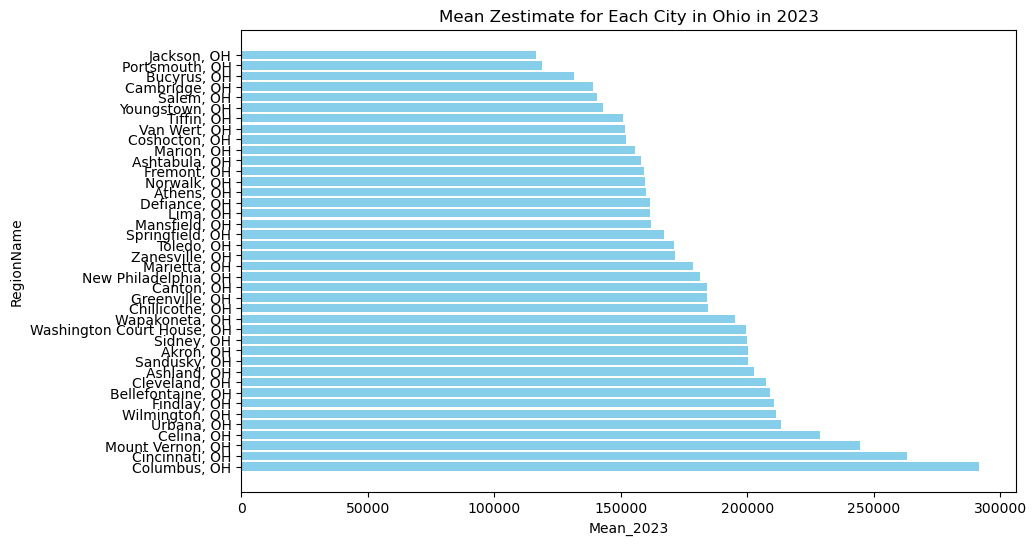

In [67]:
# Data
data = {
    'RegionName': ['Cincinnati, OH', 'Columbus, OH', 'Cleveland, OH', 'Akron, OH', 'Toledo, OH', 'Youngstown, OH', 'Canton, OH', 'Huntington, WV', 'Wheeling, WV', 'Springfield, OH', 'Mansfield, OH', 'Weirton, WV', 'Lima, OH', 'Salem, OH', 'Ashtabula, OH', 'New Philadelphia, OH', 'Zanesville, OH', 'Chillicothe, OH', 'Sandusky, OH', 'Findlay, OH', 'Portsmouth, OH', 'Marion, OH', 'Athens, OH', 'Mount Vernon, OH', 'Marietta, OH', 'Fremont, OH', 'Norwalk, OH', 'Tiffin, OH', 'Point Pleasant, WV', 'Ashland, OH', 'Greenville, OH', 'Sidney, OH', 'Wapakoneta, OH', 'Bellefontaine, OH', 'Celina, OH', 'Wilmington, OH', 'Bucyrus, OH', 'Urbana, OH', 'Cambridge, OH', 'Defiance, OH', 'Coshocton, OH', 'Jackson, OH', 'Washington Court House, OH', 'Van Wert, OH'],
    'Mean_2023': [263305.138409, 291657.197700, 207579.830264, 200133.371536, 171100.921282, 143095.933345, 184023.719445, 138880.634355, 132205.102573, 166914.659091, 161986.275973, 119279.330036, 161689.499136, 140488.626800, 157913.766209, 181300.551155, 171604.079818, 184326.868127, 200260.119964, 210528.674400, 118903.271273, 155798.867227, 160043.236936, 244497.605464, 178670.099791, 159093.650200, 159567.207145, 150751.749782, 136432.576118, 202678.053736, 184258.144655, 200018.978464, 195268.056327, 209025.609945, 228853.665545, 211180.788164, 131497.549764, 213414.454718, 139114.623236, 161362.076936, 151923.137945, 116407.309609, 199466.818136, 151535.763018]
}

# Create DataFrame
mean_df = pd.DataFrame(data)

# Filter DataFrame to only include cities in Ohio
mean_df = mean_df[mean_df['RegionName'].str.contains(', OH')]

# Sort values for a more more sleek visualization 
mean_df = mean_df.sort_values('Mean_2023')

# Plot
plt.figure(figsize=(10,6))
plt.barh(mean_df['RegionName'], mean_df['Mean_2023'], color='skyblue')
plt.xlabel('Mean_2023')
plt.ylabel('RegionName')
plt.title('Mean Zestimate for Each City in Ohio in 2023')
plt.gca().invert_yaxis()
plt.show()

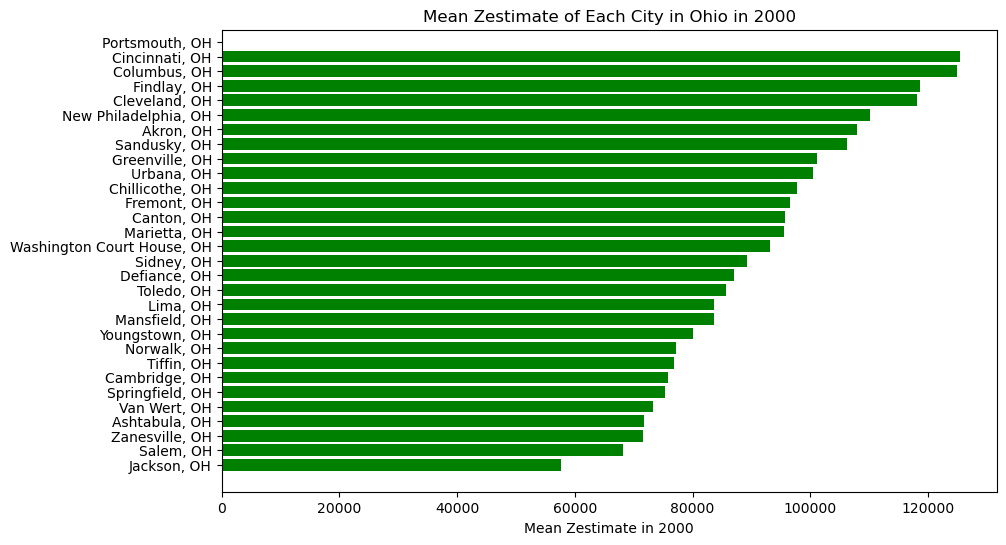

In [68]:
df_2000 = zestimate.loc[:, zestimate.columns.str.contains('2000')]  # Filter columns for the year 2000

# Calculate mean Zestimate for each city in 2000
mean_zestimate_2000 = df_2000.mean(axis=1)

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'RegionName': zestimate['RegionName'],
    'MeanZestimate2000': mean_zestimate_2000
})

# Filter DataFrame to only include cities in Ohio
plot_df = plot_df[plot_df['RegionName'].str.contains(', OH')]

# Sort values for better visualization
plot_df = plot_df.sort_values('MeanZestimate2000')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(plot_df['RegionName'], plot_df['MeanZestimate2000'], color='green')
plt.xlabel('Mean Zestimate in 2000')
plt.title('Mean Zestimate of Each City in Ohio in 2000')
plt.show()


# Comparing the average price of a home in Ohio 2000 vs. the average price of a home in Ohio in 2023

In [69]:
df_2000.head()

,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000
0,123285.59080,123248.6175,123190.11390,123465.08810,123998.75980,124864.38710,125550.3587,126231.26830,126819.39680,127415.56320,127906.59990,128342.13420
1,122802.19670,122909.1501,123081.82620,123429.69540,123850.70580,124300.54740,124820.5004,125436.13670,126062.50100,126651.15490,127179.44620,127647.74630
2,115713.93960,115883.6149,116056.98890,116418.73980,116976.62730,117631.19990,118350.4137,118928.72750,119477.84390,119975.47050,120474.06060,120984.18600
3,106289.14790,106456.4836,106577.02750,106875.41180,107149.62400,107518.09530,107910.4234,108354.61380,108823.13580,109243.51460,109698.49100,110110.85740
4,83501.85695,83582.9768,83699.29069,84039.18756,84556.47498,85203.78028,85814.4037,86429.83188,87072.96271,87726.03159,88377.10873,88922.49284


In [70]:
mean_df.head()

,RegionName,Mean_2023
41,"Jackson, OH",116407.309609
20,"Portsmouth, OH",118903.271273
36,"Bucyrus, OH",131497.549764
38,"Cambridge, OH",139114.623236
13,"Salem, OH",140488.626800


# Getting the mean values of each year

In [71]:
avg_home_2000 = df_2000.mean().mean()

In [79]:
avg_home_2023 = mean_df["Mean_2023"].mean().mean()

In [73]:
avg_home_2000

89036.87816804688

In [80]:
avg_home_2023

180530.99876675

# Visualization

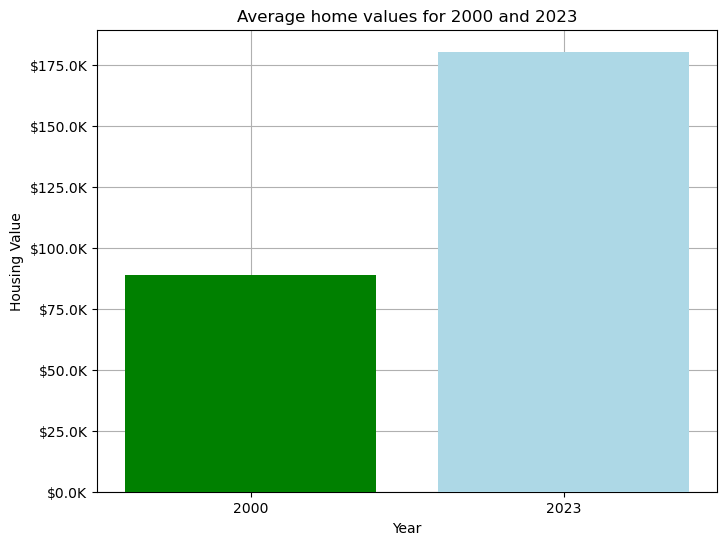

In [78]:
avg_home_2000 = 89036.87  
avg_home_2023 = 180530.99  

# Create a list of years and a list of corresponding mean values
years = ['2000', '2023']
means = [avg_home_2000, avg_home_2023]

# Define a function to format y-axis values
def thousands(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fK' % (x * 1e-3)

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots(figsize=(8, 6))
ax.yaxis.set_major_formatter(formatter)

# Specify the color of each bar
colors = ['green', 'lightblue']
plt.bar(years, means, color=colors, zorder=3)

plt.title('Average home values for 2000 and 2023')
plt.xlabel('Year')
plt.ylabel('Housing Value')
plt.grid(zorder=0)

plt.show()
